In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.font_manager as font_manager
from matplotlib import rcParams

# use paper style
style = "/home/gleung/scripts/styles/bee-paperlight.mplstyle"
# style = '/home/gleung/scripts/styles/bee-presentationtransparent.mplstyle'
plt.style.use(style)

# palettable default colors
from palettable.cartocolors.qualitative import Prism_8

prism = Prism_8.mpl_colors
blue = prism[1]
green = prism[3]
purple = prism[0]
red = prism[7]
orange = prism[6]
yellow = prism[5]
gray = "#303039"
bg = "white"
lcol = "black"

from palettable.cmocean.sequential import Ice_20

cloud = mcolors.ListedColormap(Ice_20.mpl_colors[4:])
cloud.set_bad(Ice_20.mpl_colors[4])
cloud.set_under(Ice_20.mpl_colors[4])

# set default font
font_dir = ["/home/gleung/scripts/futura"]
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams["font.family"] = "Futura"

import re

In [5]:
import os
import pandas as pd
import numpy as np

# Task 3: Test range of input vapor mixing ratios

In [26]:
dataPath = "output-rv/"

paths = [f"{dataPath}rvp{i}_parceltraj.txt" for i in range(70)]

In [44]:
out = []

for p in paths:
    with open(p) as file:
        file = file.readlines()

        rvpsurf = file[1]
        rvpsurf = float(re.findall("\d+\.\d+", rvpsurf)[1])

        cape = file[4]
        cape = float(re.findall("\d+\.\d+", cape)[0])

        lcl = file[2]
        lcl = float(re.findall("\d+\.\d+", lcl)[1])

        el = file[3]
        el = float(re.findall("\d+\.\d+", el)[0])

        out.append(pd.Series([rvpsurf, cape, lcl, el]))

df = pd.concat(out, axis=1).T
df.columns = ["RVsurf", "CAPE", "LCL", "EL"]

df[["LCL", "EL"]] = df[["LCL", "EL"]].replace(0, np.nan)
df[["LCL"]] = df[["LCL"]].replace(0.35, np.nan)

print(df)

    RVsurf      CAPE   LCL     EL
0      7.0     0.000   NaN    NaN
1      7.1     0.000   NaN    NaN
2      7.2     0.000   NaN    NaN
3      7.3     0.000   NaN    NaN
4      7.4     0.000   NaN    NaN
..     ...       ...   ...    ...
65    13.5  2285.608  1.75  10.85
66    13.6  2344.643  1.05  11.55
67    13.7  2409.281  1.05  11.55
68    13.8  2473.803  1.05  11.55
69    13.9  2538.206  1.05  11.55

[70 rows x 4 columns]


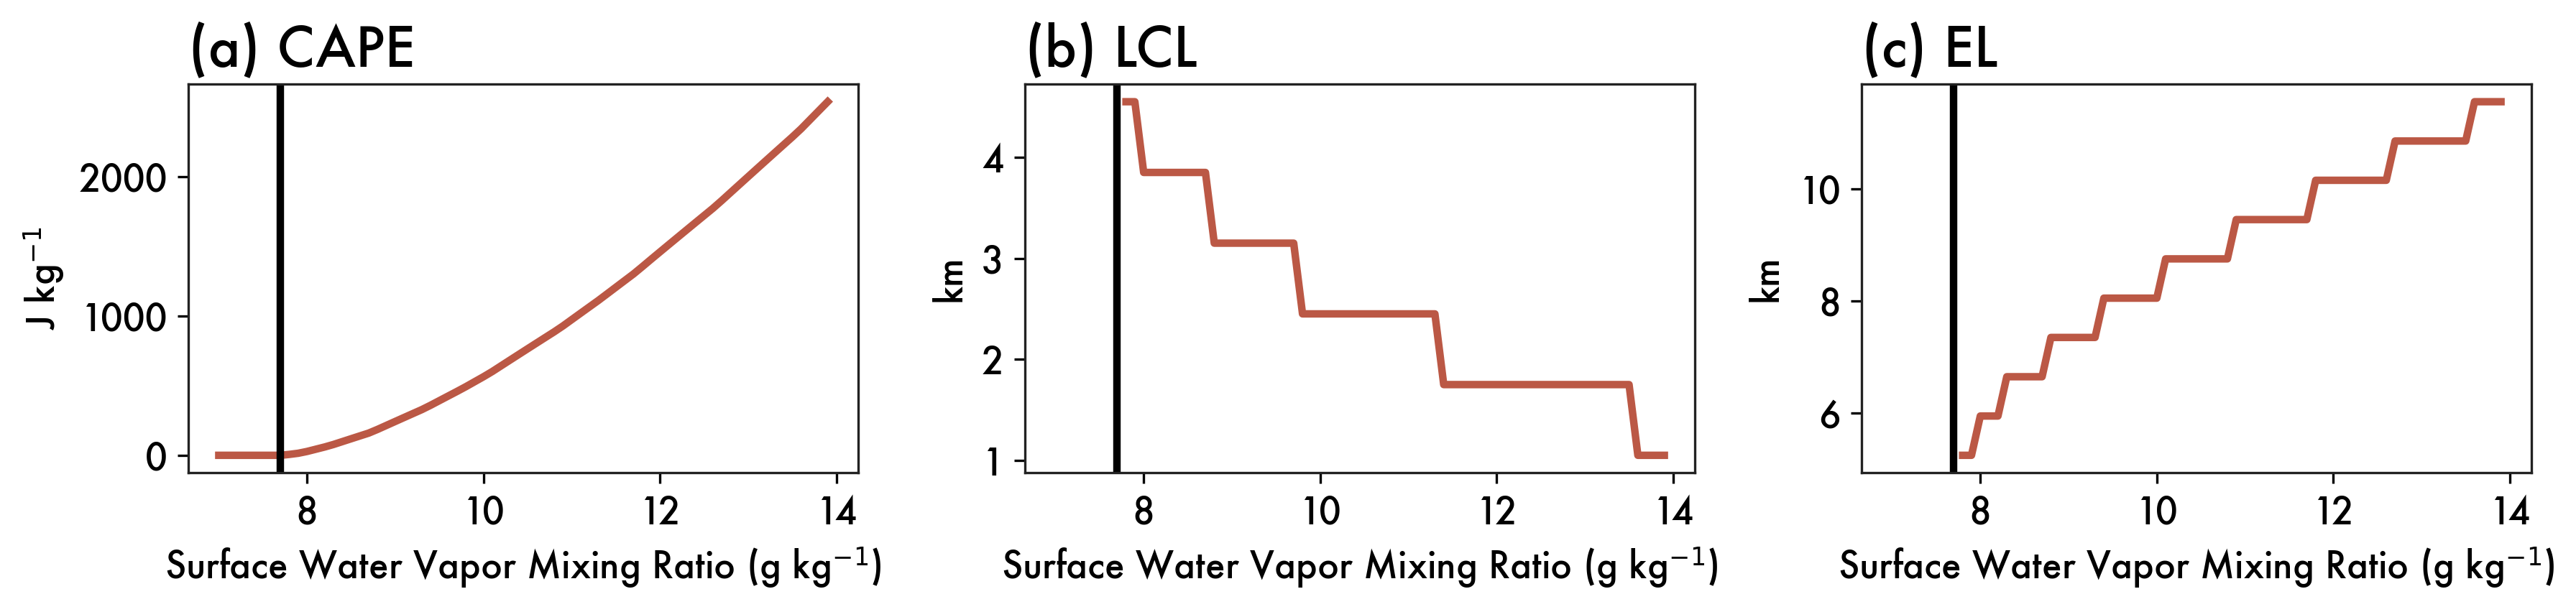

In [45]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(12, 3))

for i, (ax, var) in enumerate(zip(axes, ["CAPE", "LCL", "EL"])):
    ax.plot(df.RVsurf, df[var])

    ax.set_title(f"({char[i]}) {var}")
    ax.set_xlabel("Surface Water Vapor Mixing Ratio (g kg$^{-1}$)")

    ax.axvline(7.7)

axes[0].set_ylabel("J kg$^{-1}$")
axes[1].set_ylabel("km")
axes[2].set_ylabel("km")


plt.show()

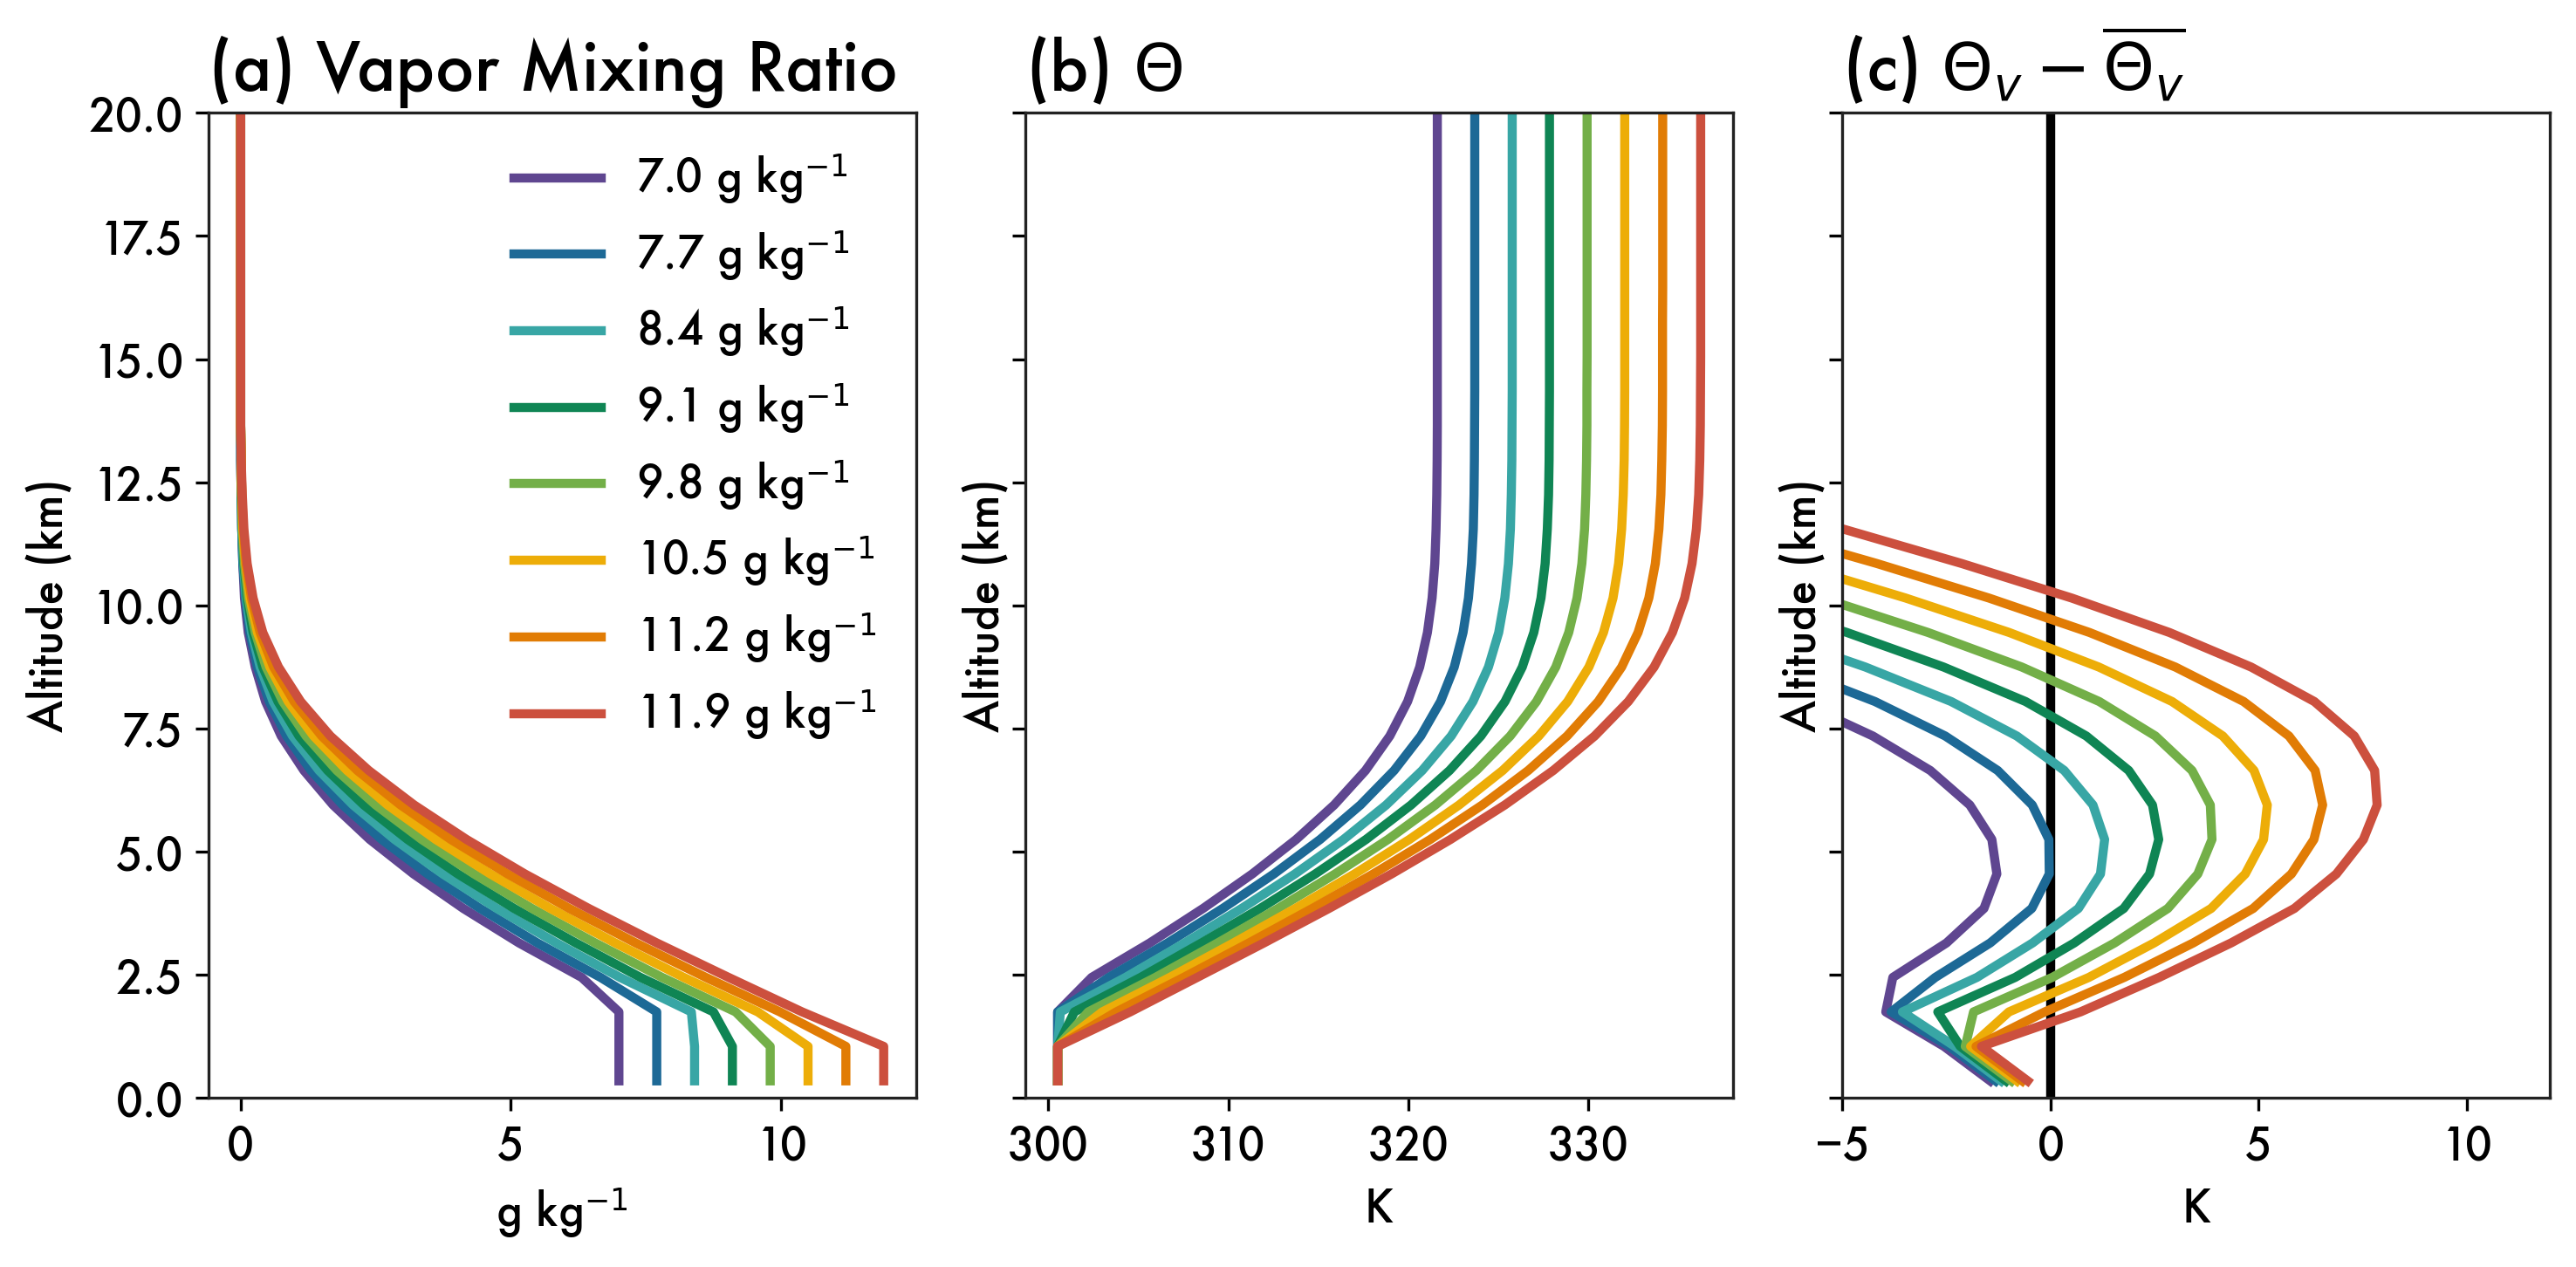

In [54]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 5))

for p, col in zip(paths[::7], prism):
    with open(p) as file:
        file = file.readlines()[7:]

        df = pd.DataFrame(file)[0].str.split(expand=True).astype("float")
        df.columns = ["k", "ht", "rvP", "thP", "thvP", "thv_diff"]

        axes[0].plot(
            df.rvP, df.ht, color=col, label=f"{df.rvP[0]} g kg$^{{-1}}$"
        )
        axes[1].plot(df.thP, df.ht, color=col)
        axes[2].plot(df.thv_diff, df.ht, color=col)


axes[2].axvline(0, zorder=0)
axes[2].set_xlim(-5, 12)

for ax in axes:
    ax.set_ylim(0, 20)
    ax.set_ylabel("Altitude (km)")

axes[0].set_xlabel("g kg$^{-1}$")
axes[1].set_xlabel("K")
axes[2].set_xlabel("K")

axes[0].set_title("(a) Vapor Mixing Ratio")
axes[1].set_title("(b) $\Theta$")
axes[2].set_title("(c) $\Theta_v - \overline{\Theta_v}$")
axes[0].legend()

# Task 4: Test sensitivity to vertical grid spacing

In [48]:
dataPath = "output-nz/"

paths = [f"{dataPath}dz{i}_parceltraj.txt" for i in [175, 350, 700, 1400, 2800]]

In [51]:
out = []

for p in paths:
    with open(p) as file:
        file = file.readlines()

        rvpsurf = file[1]
        dz = float(re.findall("-?\d+\.\d+", rvpsurf)[0]) * 2000
        rvpsurf = float(re.findall("-?\d+\.\d+", rvpsurf)[1])

        cape = file[4]
        cape = float(re.findall("-?\d+\.\d+", cape)[0])

        lcl = file[2]
        lcl = float(re.findall("-?\d+\.\d+", lcl)[1])

        el = file[3]
        el = float(re.findall("-?\d+\.\d+", el)[0])

        out.append(pd.Series([dz, rvpsurf, cape, lcl, el]))

df = pd.concat(out, axis=1).T
df.columns = ["dz", "RVsurf", "CAPE", "LCL", "EL"]

df[["LCL", "EL"]] = df[["LCL", "EL"]].replace(0, np.nan)

In [52]:
char = "abcd"

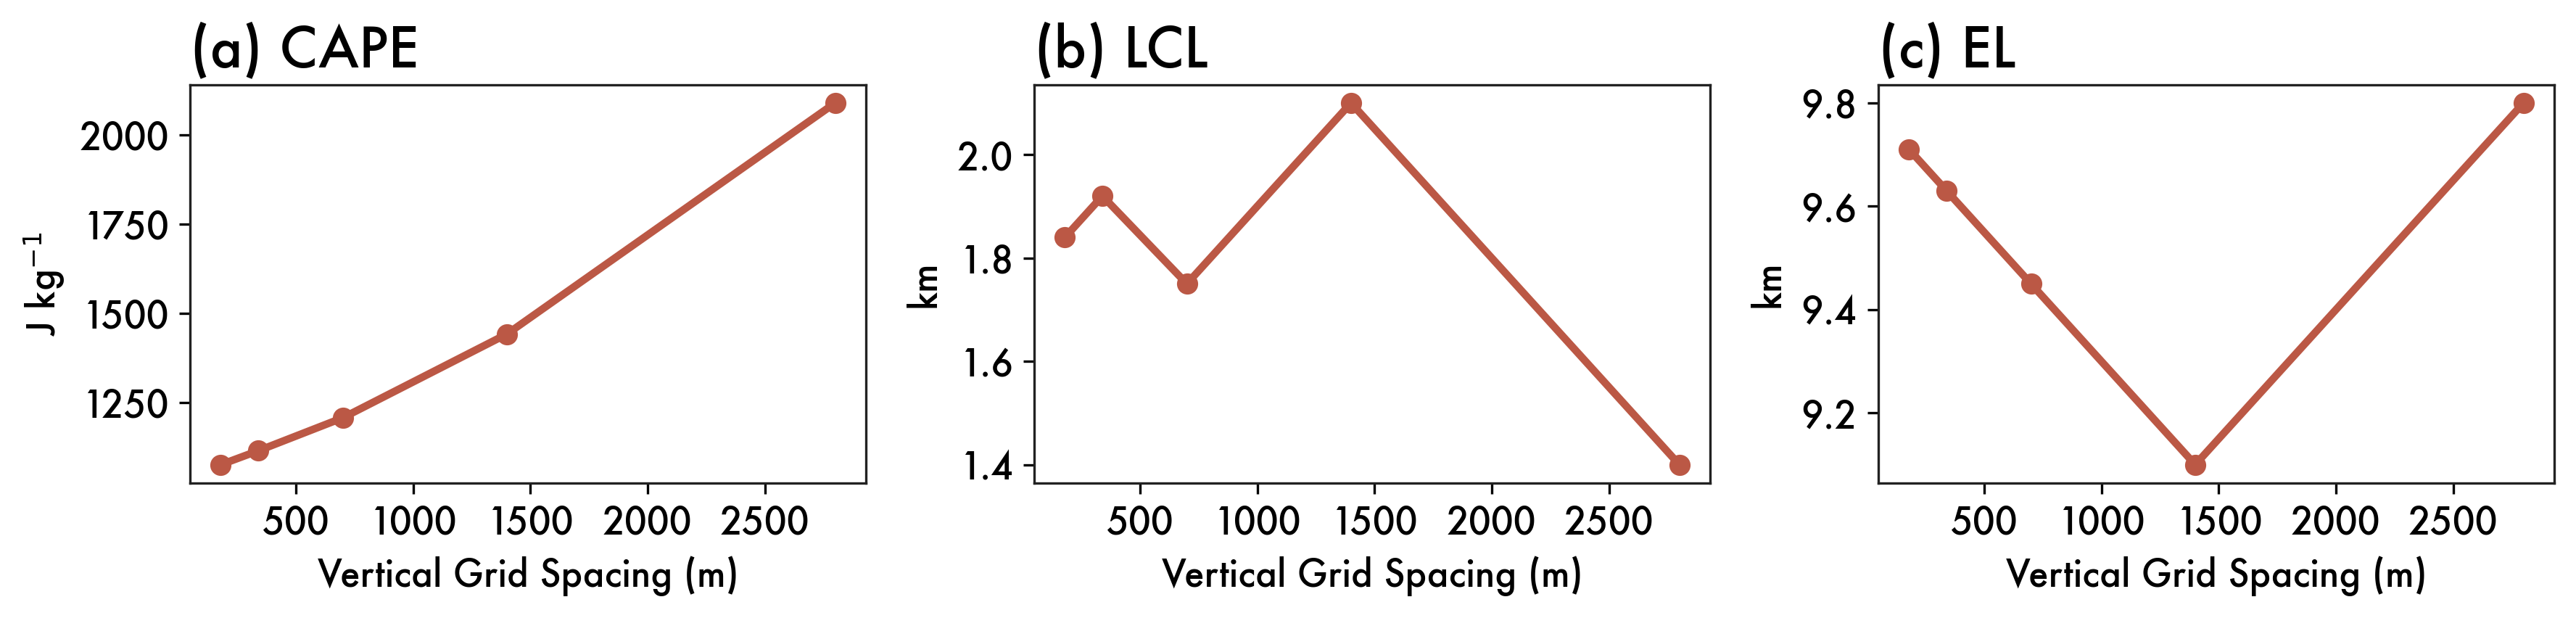

In [53]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(12, 3))

for i, (ax, var) in enumerate(zip(axes, ["CAPE", "LCL", "EL"])):
    ax.set_title(f"({char[i]}) {var}")
    ax.plot(df.dz, df[var], marker="o")
    ax.set_xlabel("Vertical Grid Spacing (m)")

axes[0].set_ylabel("J kg$^{-1}$")
axes[1].set_ylabel("km")
axes[2].set_ylabel("km")

plt.show()

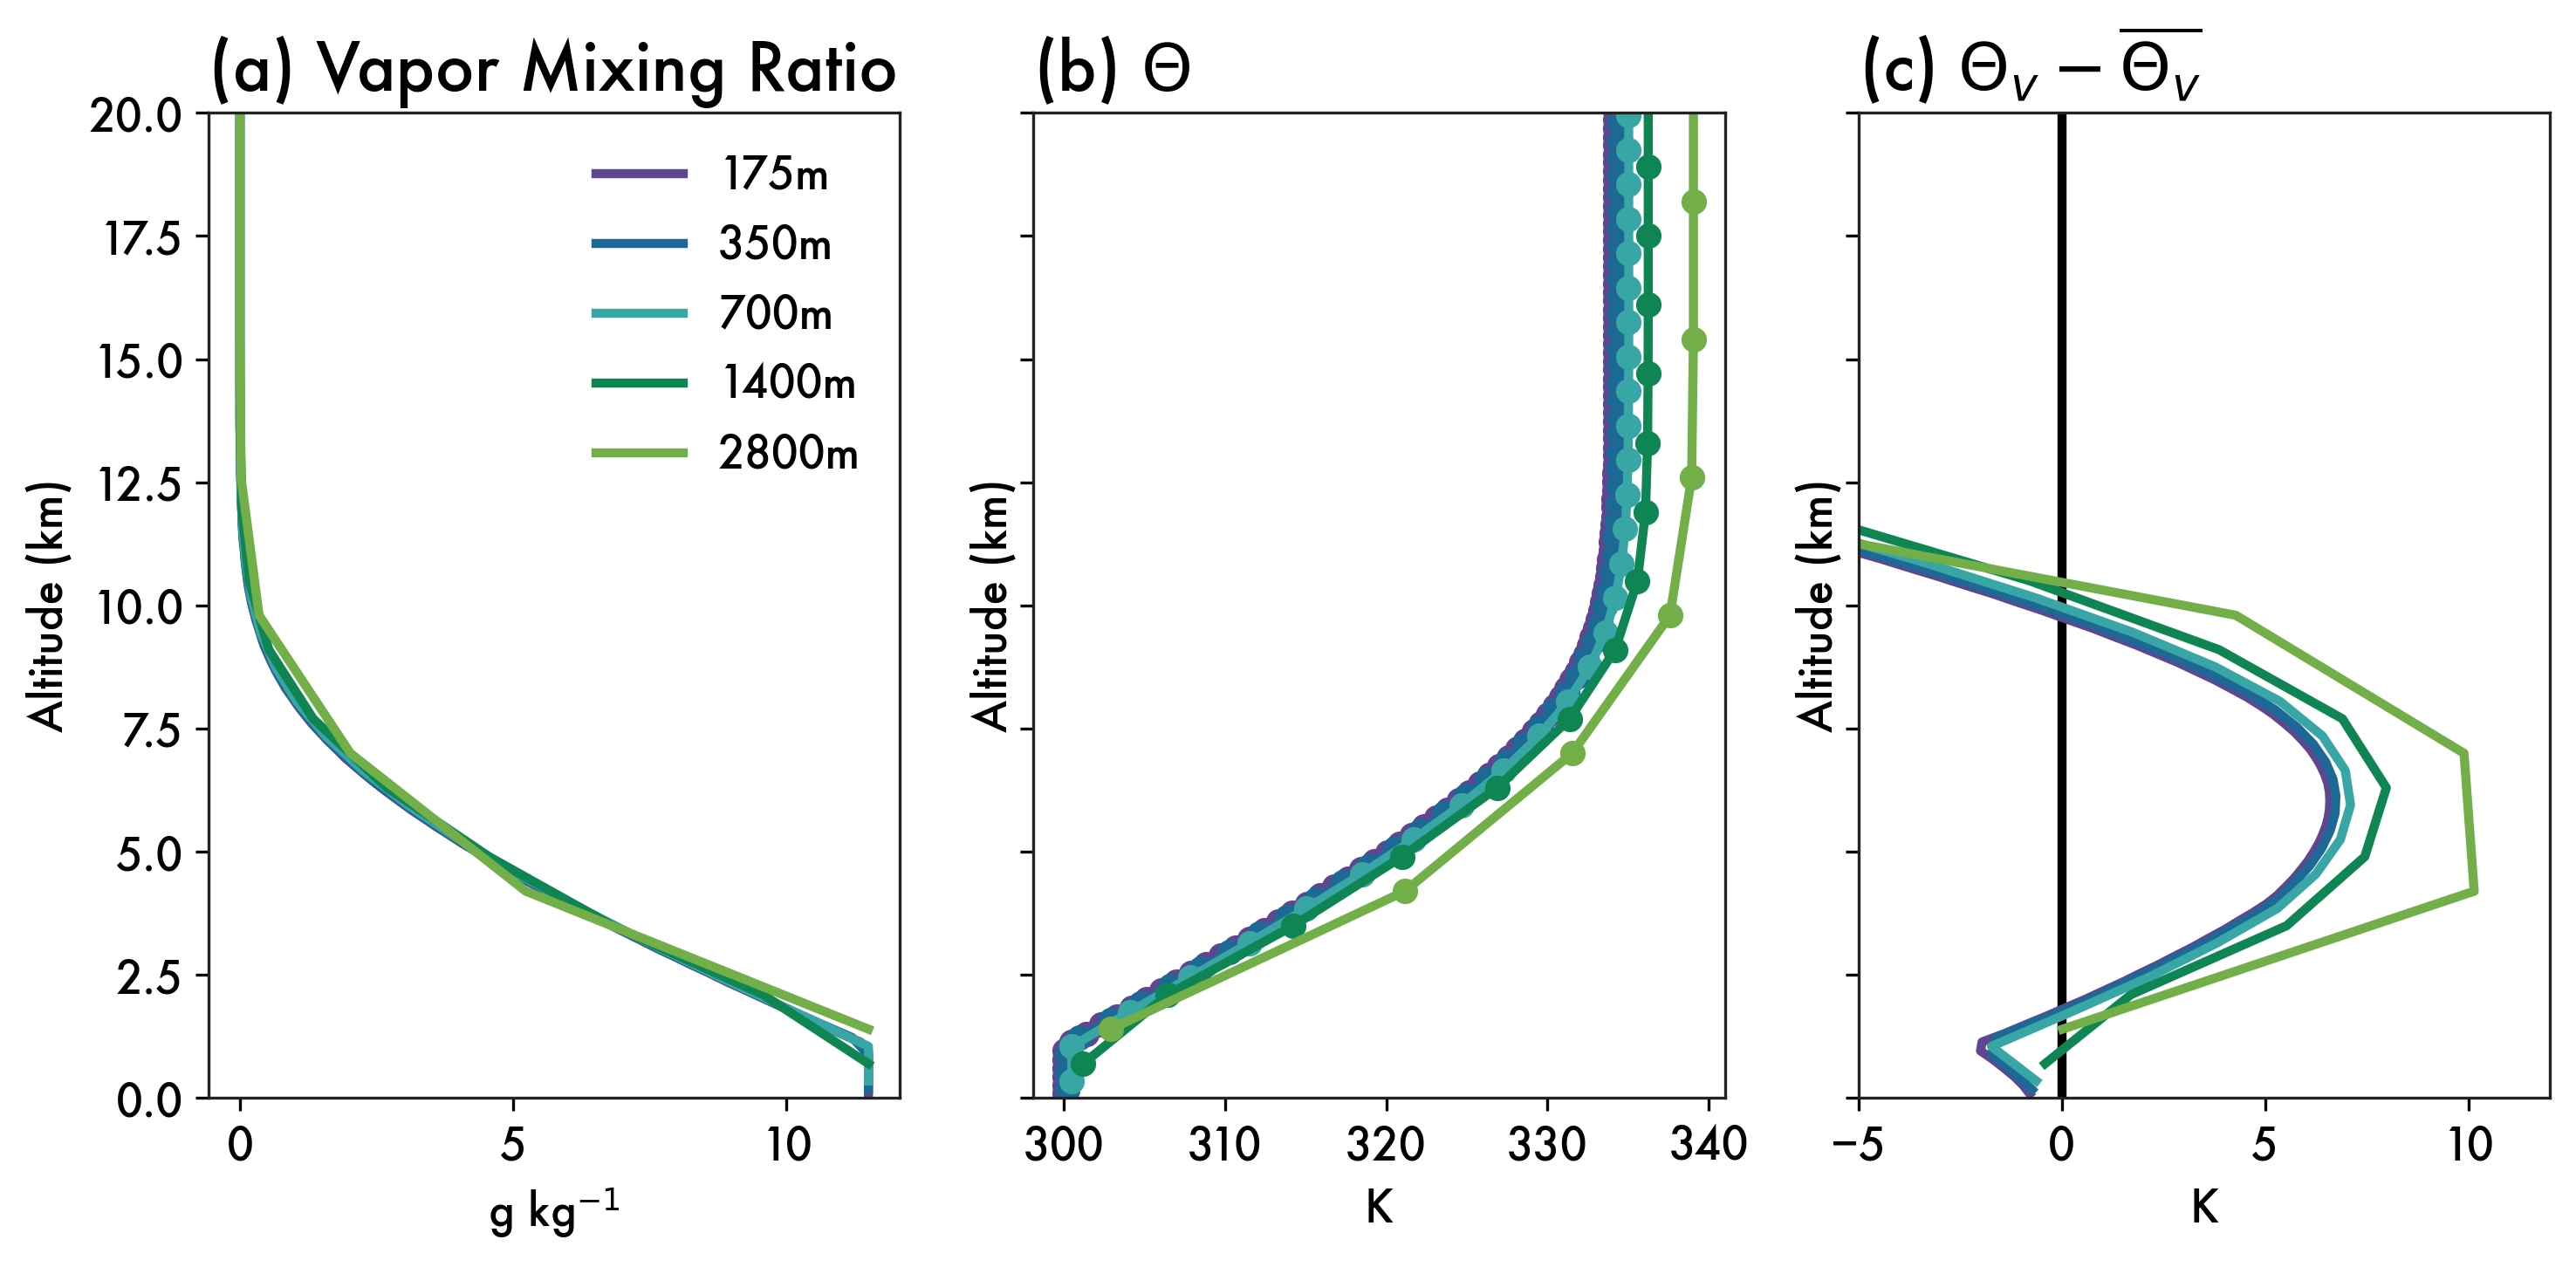

In [65]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 5))

for p, col, lab in zip(
    paths, prism, ["175m", "350m", "700m", "1400m", "2800m"]
):
    with open(p) as file:
        file = file.readlines()[7:]

        df = pd.DataFrame(file)[0].str.split(expand=True).astype("float")
        df.columns = ["k", "ht", "rvP", "thP", "thvP", "thv_diff"]

        axes[0].plot(df.rvP, df.ht, color=col, label=lab)
        axes[1].plot(df.thP, df.ht, color=col, marker="o")
        axes[2].plot(df.thv_diff, df.ht, color=col)

axes[2].axvline(0, zorder=0)
axes[2].set_xlim(-5, 12)


axes[2].axhline
for ax in axes:
    ax.set_ylim(0, 20)
    ax.set_ylabel("Altitude (km)")

axes[0].set_xlabel("g kg$^{-1}$")
axes[1].set_xlabel("K")
axes[2].set_xlabel("K")

axes[0].set_title("(a) Vapor Mixing Ratio")
axes[1].set_title("(b) $\Theta$")
axes[2].set_title("(c) $\Theta_v - \overline{\Theta_v}$")


axes[0].legend()